Problem Statement :  To build a classification methodology to predict the type of Thyroid a person has ,based on the below features.

age - Age of the person

sex - Male or Female

on_thyroxine - true or false

on_antithyroid_medication - true or false

sick - true or false

pregnant - true or false

thyroid_surgery - true or false

I131_treatment - true or false

query_hypothyroid - true or false

query_hyperthyroid -true or false

lithium - true or false

goitre - true or false

tumor - true or false

hypopituitary- true or false

psych - true or false

TSH_measured - true or false

TSH - thyroid stimulating hormone floating value

T3_measured - true or false

T3 - triiodothyronine value

TT4_measured- true or false

TT4 - Thyroxine value

T4U_measured- true or false

T4U - numerical value

FTI_measured- true or false

FTI -Free Thyroxine Index

TBG_measured- true or false

TBG -Thyroid-Binding Globulin  value

referral_source - different sources of referals

Class - different types of thyroid

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
sns.set()
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score,plot_confusion_matrix, roc_curve, auc
from pandas_profiling import ProfileReport

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data  = pd.read_csv('/content/drive/MyDrive/data for colab/hypothyroid.csv')

In [4]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,?,SVI,negative


In [5]:
data.shape

(3772, 30)

In [6]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative


In [7]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,288,2,70,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,369,3003,769,3541,231,3385,387,3387,385,3772,3772,2201,3481


It can be see that from the data description that there are no missing values. But if in the dataset the missing values are replaced with invalid values like '?'. So i replaced such values with 'nan' and checked for missing values again.

In [8]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        print(column, data[column][data[column]=='?'].count())    

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


So these are the columns which have missing values but missing values are replaced with '?'. We will replace these values with 'nan' and then do imputation of these missing values. 

The column 'TBG' has all the values missing. So dropping this column as it is of no use.

Also, looking to the dataset, It can be see that some columns are with true and false value are just the indication that whether the next column has values or not. 

In [9]:
data = data.drop(['TBG'],axis =1)

In [10]:
#T4U_measured just showed that T4U has a value or not
data[['T4U_measured','T4U']] 

,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87
...,...,...
3767,f,?
3768,t,1.08
3769,t,1.07
3770,t,0.94


Since, there are missing values and we are gonna handle them, there is no point of having such columns just for indicating next column has value or not.
Dropping such columns as well.

In [11]:
data = data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)

In [12]:
# replacing the '?' values with numpy nan
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        data[column] = data[column].replace('?',np.nan)    

In [13]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count==0:
        print(column, data[column][data[column]=='?'].count())    

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


Great!! Now that we have replaced all such values with 'nan'. Let's deal with these missing values now.

In [14]:
data.isna().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

Since the values are categorical, changing them to numerical before using any imputation techniques.

Using mapping for columns with two distinct values and get dummies where there are moer then two values why so because there are only two categories then the two columns formed after get dummies will both have very high correaltion since they both explain the same thing. 
So in anyway we got to drop one of the columns. That's why using mapping for such columns.

In [15]:
# for column in data.columns:
#     print(column, (data[column].unique()))

In [16]:
# mapping the categorical values like below:
data['sex'] = data['sex'].map({'F' : 0, 'M' : 1})

# except for 'Sex' column all the other columns with two categorical data have same value 'f' and 't'.
# so instead of mapping indvidually, usign a loop to do the mapping
for column in data.columns:
    if  len(data[column].unique())==2:
        data[column] = data[column].map({'f' : 0, 't' : 1})
        
# this will map all the rest of the columns. Now there are handful of column left with more than 2 categories. 

In [17]:
data['referral_source'].unique() #referel_source has 5 categories usign get dummies on it 

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [18]:
# using get_dummies with that.
data = pd.get_dummies(data, columns=['referral_source'])

Now our ouptut class also has 4 distinct categories. There is no sense of using get dummies with our Output class, so just mapping them by using LabelEncoder function for this.

In [19]:
data['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [20]:
lblEn = LabelEncoder()

data['Class'] =lblEn.fit_transform(data['Class'])

In [21]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,1,0,1,0,0,0
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,1,0,0,0,0,1
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,1,0,0,0,0,1
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,1,0,0,0,0,1
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,1,0,0,0,1,0


In [22]:
data.describe(include='all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3771,3622.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3403,3003,3541,3385,3387,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
unique,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287,69,241,146,234,NaN,NaN,NaN,NaN,NaN,NaN
top,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,2,101,0.99,100,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116,238,71,95,73,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.315295,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,0.062831,0.004772,0.009014,0.025451,0.000265,0.048780,NaN,NaN,NaN,NaN,NaN,0.974814,0.029692,0.102333,0.010339,0.274125,0.583510
std,NaN,0.464698,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,0.242692,0.068924,0.094525,0.157510,0.016282,0.215437,NaN,NaN,NaN,NaN,NaN,0.279508,0.169760,0.303126,0.101169,0.446131,0.493042
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000


In [23]:
# for column in data.columns:
#     print(column, (data[column].unique()))

All the encoding for Categorical values is done. Imputing the missing values using KNN Imputer.

In [24]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data) # impute the missing values
# converting the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=np.round(new_array), columns=data.columns)

In [25]:
new_data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.737275,0.307529,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,0.062831,0.004772,0.009014,0.025451,0.000265,0.048780,4.831124,2.027306,108.459438,1.020944,110.301166,0.974814,0.029692,0.102333,0.010339,0.274125,0.583510
std,20.082478,0.461532,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,0.242692,0.068924,0.094525,0.157510,0.016282,0.215437,23.323816,0.785068,34.838114,0.165546,32.145618,0.279508,0.169760,0.303126,0.101169,0.446131,0.493042
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,88.000000,1.000000,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,104.000000,1.000000,107.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,124.000000,1.000000,124.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,11.000000,430.000000,2.000000,395.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
new_data.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

Now there are no missing values in the new dataset. 


Checking the distribution for continous data in the dataset:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

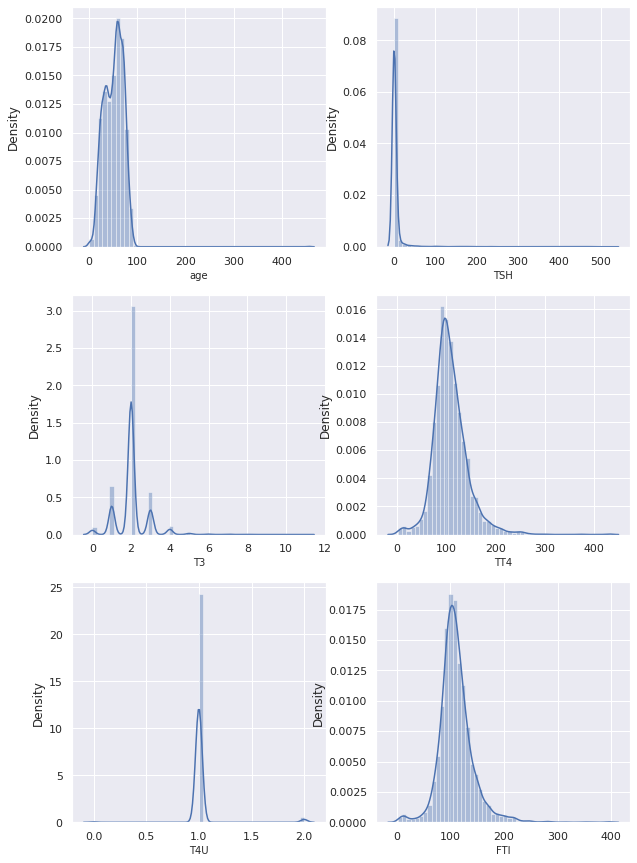

In [27]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plot.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plot.subplot(3,2,plotnumber)
    sns.distplot(new_data[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

The graphs for age, TSH and T3 looks heavely skewed towards left. Let's do some transformations to the data and see if it improves the plot.

Before doing log transformation , let's add 1 to each valuue in the column to handle exception when we try to find log of '0'.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

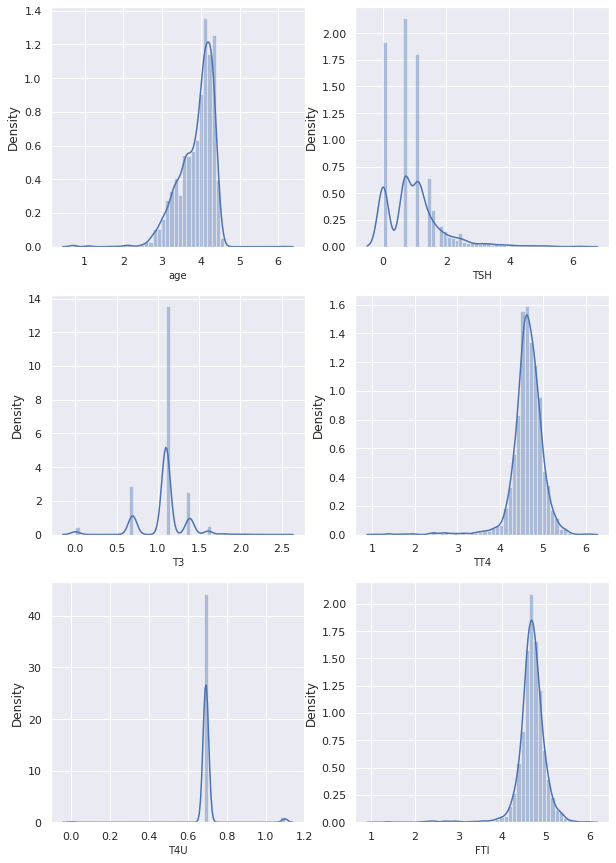

In [28]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plot.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_data[column]+=1
    ax = plot.subplot(3,2,plotnumber)
    sns.distplot(np.log(new_data[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

After log transformation, rest of the columns look fine but 'TSH' has a weird trend.

It won't give much of information so dropping this column.

In [29]:
new_data = new_data.drop(['TSH'],axis=1)


#### Checking how balanced the dataset in terms of given target classes:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


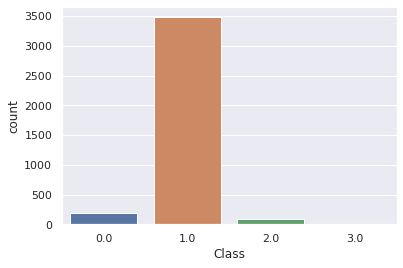

In [30]:
sns.countplot(new_data['Class'])   

the dataset is highly imbalanced. 

using imbalanced-learn to deal with imbalanced data.

Imbalanced learn has an algorithm called RandomOverSampler. 

Note: https://pypi.org/project/imbalanced-learn/

https://github.com/scikit-learn-contrib/imbalanced-learn


# Handling imbalanced dataset
https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/



In [31]:
x = new_data.drop(['Class'],axis=1)
y = new_data['Class']
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

In [32]:
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

In [33]:
x_sampled.shape

(13924, 25)

In [34]:
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)

In [35]:
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0
13920,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0
13921,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0
13922,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


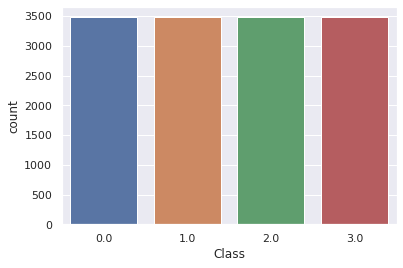

In [36]:
sns.countplot(y_sampled)       

The dataset looks balanced now. 

Checking for corelations in dataset

In [37]:
#combining the data and keeping it 
combined_data = pd.concat([x_sampled, y_sampled], axis=1)
combined_data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,Class
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0,1.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0,3.0
13920,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0,3.0
13921,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0,3.0
13922,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0,3.0


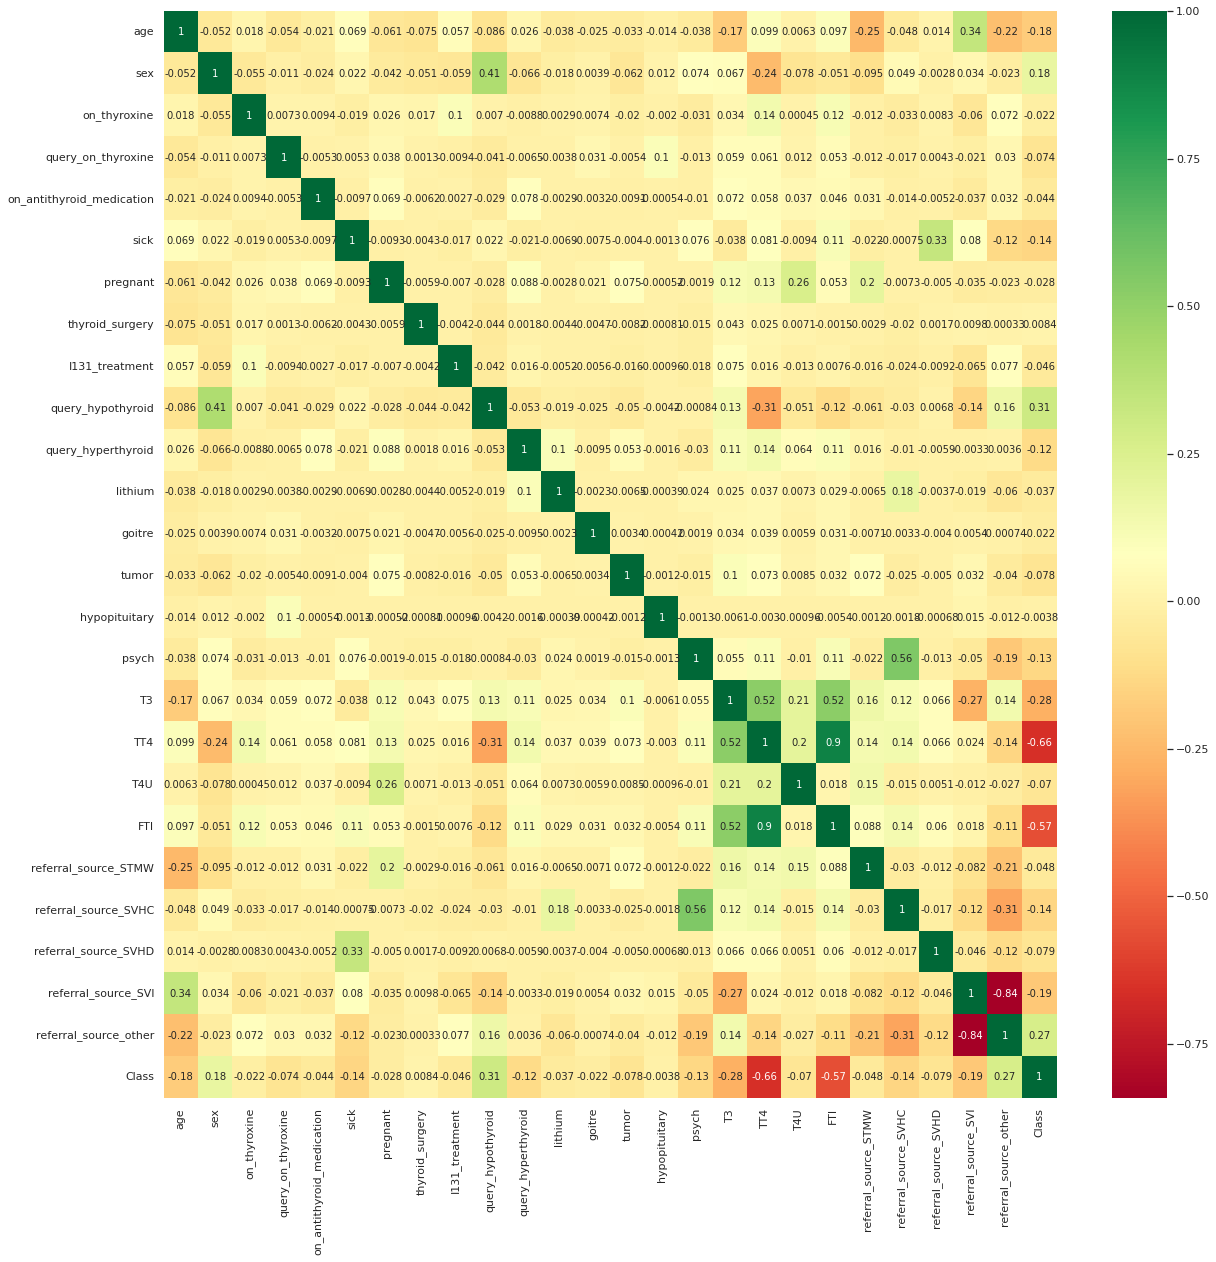

In [38]:
#get correlations of each features in dataset
corrmat = combined_data.corr()
top_corr_features = corrmat.index
plot.figure(figsize=(20,20))
#plot heat map
sns.heatmap(combined_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We can see target class is negatively corelated with TT4 and FTI 

In [39]:
combined_data.corr()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,Class
age,1.000000,-0.051501,0.018058,-0.053710,-0.021346,0.068645,-0.060930,-0.074566,0.057442,-0.086438,0.026202,-0.037604,-0.025027,-0.033494,-0.014140,-0.038205,-0.174632,0.099045,0.006324,0.096788,-0.245099,-0.047955,0.014064,0.341230,-0.224213,-0.179943
sex,-0.051501,1.000000,-0.055364,-0.010773,-0.024231,0.021639,-0.042022,-0.050599,-0.059484,0.411867,-0.066445,-0.017504,0.003923,-0.062080,0.012467,0.074252,0.066668,-0.243836,-0.078141,-0.051367,-0.095004,0.049314,-0.002788,0.033570,-0.023495,0.182717
on_thyroxine,0.018058,-0.055364,1.000000,0.007309,0.009431,-0.019094,0.026329,0.016977,0.102413,0.006977,-0.008824,0.002941,0.007390,-0.020376,-0.002032,-0.031044,0.034428,0.137764,0.000454,0.117569,-0.011682,-0.033491,0.008328,-0.059604,0.071942,-0.021673
query_on_thyroxine,-0.053710,-0.010773,0.007309,1.000000,-0.005286,0.005344,0.037632,0.001316,-0.009382,-0.041186,-0.006484,-0.003766,0.031462,-0.005399,0.102797,-0.012825,0.058774,0.060514,0.011502,0.053388,-0.011789,-0.017434,0.004295,-0.020824,0.029713,-0.073739
on_antithyroid_medication,-0.021346,-0.024231,0.009431,-0.005286,1.000000,-0.009691,0.069101,-0.006151,0.002717,-0.029216,0.078304,-0.002929,-0.003172,-0.009100,-0.000543,-0.009974,0.072293,0.057825,0.037270,0.045792,0.030967,-0.013558,-0.005171,-0.036746,0.031545,-0.043763
sick,0.068645,0.021639,-0.019094,0.005344,-0.009691,1.000000,-0.009343,-0.004277,-0.017200,0.021742,-0.021335,-0.006905,-0.007478,-0.003990,-0.001281,0.075680,-0.038056,0.080763,-0.009407,0.110930,-0.021613,-0.000749,0.333499,0.080094,-0.124908,-0.143668
pregnant,-0.060930,-0.042022,0.026329,0.037632,0.069101,-0.009343,1.000000,-0.005931,-0.007034,-0.027963,0.088362,-0.002824,0.020573,0.075047,-0.000524,-0.001937,0.119751,0.132625,0.260774,0.052570,0.199238,-0.007310,-0.004986,-0.035428,-0.023122,-0.027644
thyroid_surgery,-0.074566,-0.050599,0.016977,0.001316,-0.006151,-0.004277,-0.005931,1.000000,-0.004193,-0.044151,0.001785,-0.004383,-0.004747,-0.008189,-0.000813,-0.014925,0.042842,0.025121,0.007087,-0.001451,-0.002937,-0.020289,0.001689,0.009800,0.000333,0.008446
I131_treatment,0.057442,-0.059484,0.102413,-0.009382,0.002717,-0.017200,-0.007034,-0.004193,1.000000,-0.042457,0.015833,-0.005199,-0.005630,-0.016152,-0.000964,-0.017702,0.074627,0.015808,-0.012875,0.007554,-0.016272,-0.024064,-0.009178,-0.065221,0.077449,-0.046316
query_hypothyroid,-0.086438,0.411867,0.006977,-0.041186,-0.029216,0.021742,-0.027963,-0.044151,-0.042457,1.000000,-0.052969,-0.018882,-0.024717,-0.050254,-0.004234,-0.000840,0.129872,-0.314706,-0.050836,-0.122069,-0.061180,-0.030207,0.006780,-0.139763,0.160041,0.306645


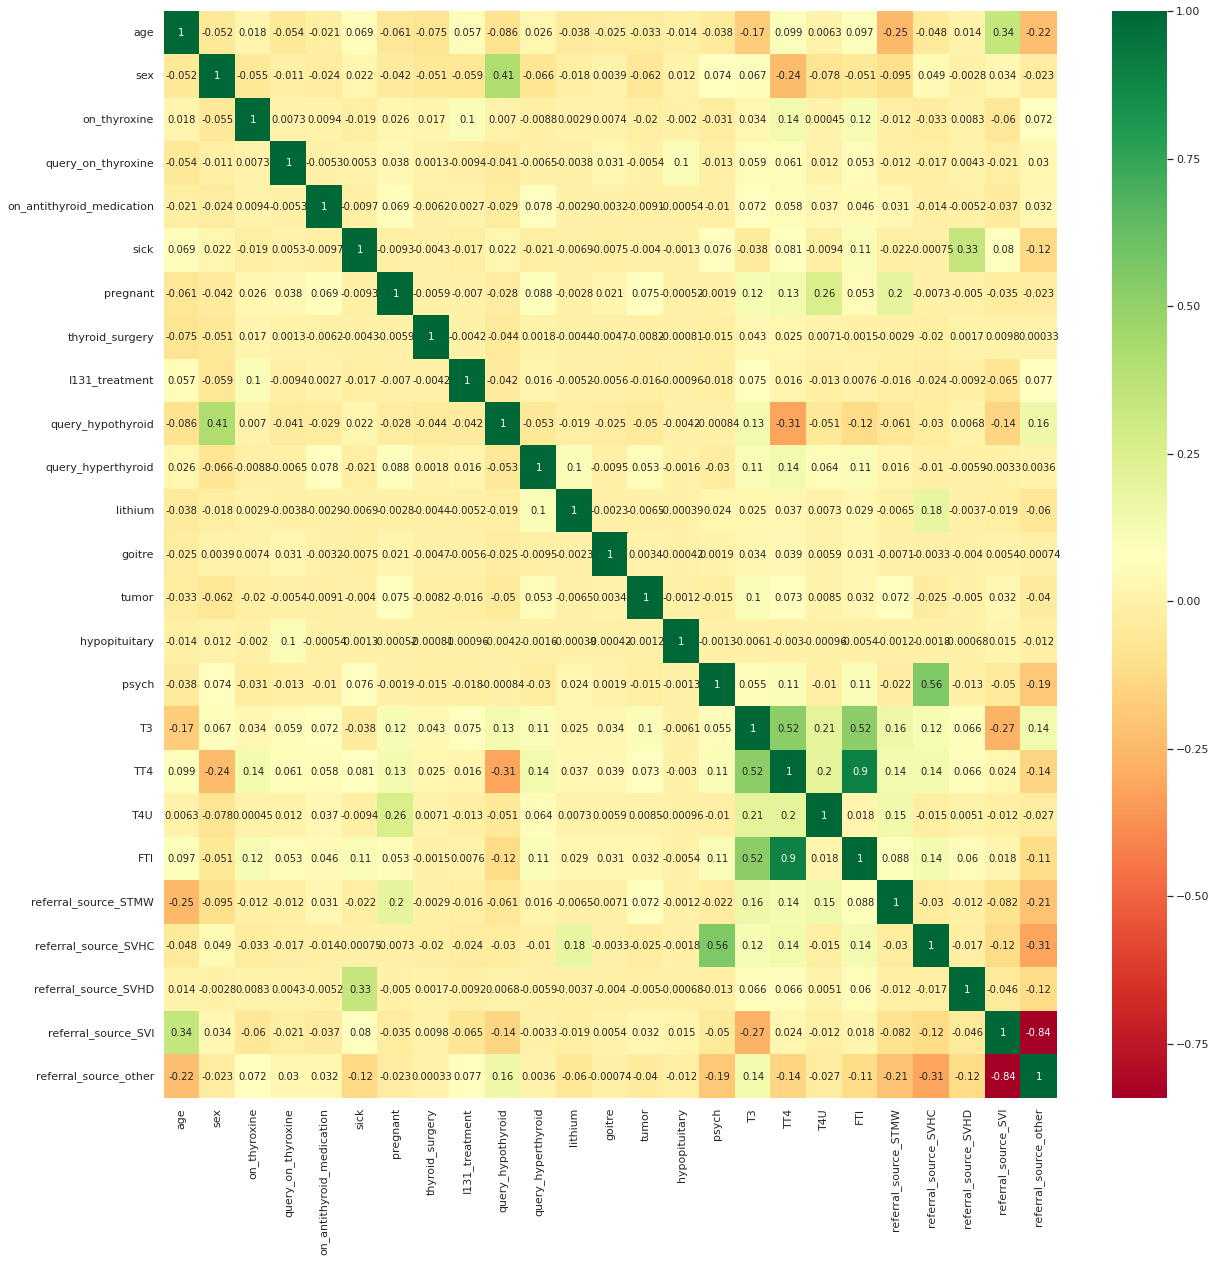

In [40]:
#same corealations can be seend on sampled data with out the target class 
#get correlations of each features in dataset
corrmat = x_sampled.corr()
top_corr_features = corrmat.index
plot.figure(figsize=(20,20))
#plot heat map
sns.heatmap(x_sampled[top_corr_features].corr(),annot=True,cmap="RdYlGn")

The clustering of thyroid can be done considering different features. Here I'm trying to cluster different target Classes based on the sex and Recovery rate of indivisual country.

Checking the clusters

In [150]:
X=combined_data[["TT4","FTI"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
std=StandardScaler()
X=std.fit_transform(X) 
X

array([[ 1.35166778,  0.93186611],
       [ 0.79803086,  0.90490019],
       [ 0.96652906,  1.22849133],
       ...,
       [-0.50181233, -0.55125996],
       [-1.12766276, -0.47036218],
       [-0.50181233, -0.55125996]])

In [125]:
'''from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
wcss=[]
for i in range(1,7):#different cluster range 
  kmeans = KMeans(i)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plot.plot(number_clusters,wcss)
plot.title('The Elbow title')
plot.xlabel('Number of clusters')
plot.ylabel('WCSS')'''

"from sklearn.cluster import KMeans\nfrom sklearn.metrics import silhouette_score,silhouette_samples\nwcss=[]\nfor i in range(1,7):\n  kmeans = KMeans(i)\n  kmeans.fit(X)\n  wcss_iter = kmeans.inertia_\n  wcss.append(wcss_iter)\n\nnumber_clusters = range(1,7)\nplot.plot(number_clusters,wcss)\nplot.title('The Elbow title')\nplot.xlabel('Number of clusters')\nplot.ylabel('WCSS')"

In [151]:
#using elbow method to dtetrminne the number of clusters and validating it through silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_    
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

Text(0.5, 1.0, 'Silhouette Score Method')

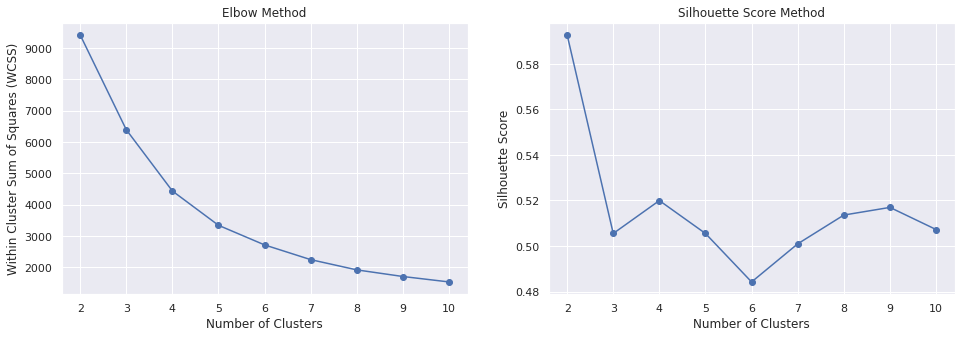

In [152]:
#silhouette_score to validate number of clusters are chosen correctly 
fig, (ax1, ax2) = plot.subplots(1, 2,figsize=(16,5))
x=np.arange(2,11)
ax1.plot(x,wcss,marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Within Cluster Sum of Squares (WCSS)")
ax1.set_title("Elbow Method")
x=np.arange(2,11)
ax2.plot(x,sil,marker='o')
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score Method")

We can seefrom the elbow method results and silhoutte score methods it is good to go ahead with K = 4

In [153]:
clf_final=KMeans(n_clusters=2,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(n_clusters=2, random_state=6)

In [154]:
combined_data["Clusters"]=clf_final.predict(X)

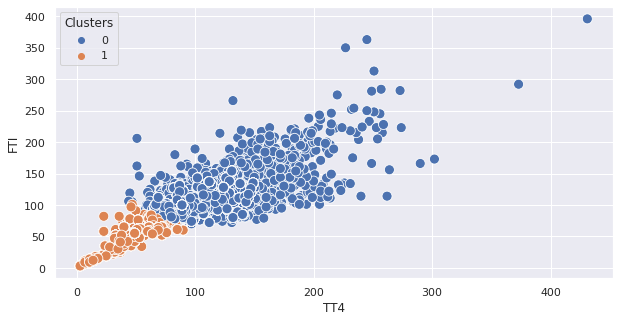

In [156]:
plot.figure(figsize=(10,5))
sns.scatterplot(x=combined_data["TT4"],y=combined_data["FTI"],hue=combined_data["Clusters"],s=100)

In [159]:
print("Few points in dataset belonging to Cluster 0: ",list(combined_data[combined_data["Clusters"]==0].head(10).index))
print("Few points in dataset belonging to Cluster 1: ",list(combined_data[combined_data["Clusters"]==1].head(10).index))

Few points in dataset belonging to Cluster 0:  [0, 1, 2, 3, 5, 7, 8, 9, 10, 11]
Few points in dataset belonging to Cluster 1:  [4, 6, 34, 40, 57, 62, 88, 89, 91, 113]


Checking the VIF score for multicollinearity

In [49]:
def vif_score(x):
    scaler = StandardScaler() # performing scaling on data without output class 
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])

In [50]:
vif_score(x_sampled)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,FEATURE,VIF_SCORE
0,age,1.290405
1,sex,1.427358
2,on_thyroxine,1.056987
3,query_on_thyroxine,1.025462
4,on_antithyroid_medication,1.017032
5,sick,1.178859
6,pregnant,1.131882
7,thyroid_surgery,1.018350
8,I131_treatment,1.041630
9,query_hypothyroid,1.589477


We can see that the data has multicollinearity the features which are depicting that are referral_source_STMW, referral_source_SVHC, referral_source_SVHD	referral_source_SVI, referral_source_other, TT4 and FTI	 so dropping the first four referral_source_STMW, referral_source_SVHC, referral_source_SVHD	referral_source_SVI, TT4 and FTI for preventing multicollinearity

NOTE: here FTI and TT4 are the feature we performed clustering on but due to high VIF value i am dropping those (the dataset is small) and from the corelation matiex asfter drooping the feature TT$ anf FTI we can see that there ain't any features with positive corelation so here we can take advice from doctors to ask which are the prominent featrures as ooer them to perform our clustering in making the model better or we can incllude those two features without dropping with high VIF and then compute the results or drop them and compite the results (a discussion between client and supervisor is first required in these scenarios) 

Here i have finally decided to dropped the columns to prevent multicollinearity.

In [51]:
x_sampled.drop('referral_source_STMW', axis=1, inplace = True)

In [52]:
x_sampled.drop('referral_source_SVHC', axis=1, inplace = True)

In [53]:
x_sampled.drop('referral_source_SVHD', axis=1, inplace = True)

In [54]:
x_sampled.drop('referral_source_SVI', axis=1, inplace = True)

In [55]:
x_sampled.drop('TT4', axis=1, inplace = True)

In [56]:
x_sampled.drop('FTI', axis=1, inplace = True)

In [160]:
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,T4U,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
13920,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0
13921,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0
13922,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0


In [139]:
# checking VIF score agian 
vif_score(x_sampled)

,FEATURE,VIF_SCORE
0,age,1.116410
1,sex,1.244004
2,on_thyroxine,1.021590
3,query_on_thyroxine,1.022600
4,on_antithyroid_medication,1.016755
5,sick,1.024327
6,pregnant,1.099581
7,thyroid_surgery,1.013246
8,I131_treatment,1.034066
9,query_hypothyroid,1.275561


Now we can see that multicollinearity is not present in the data proceding ahead with training the model using different algorithms 

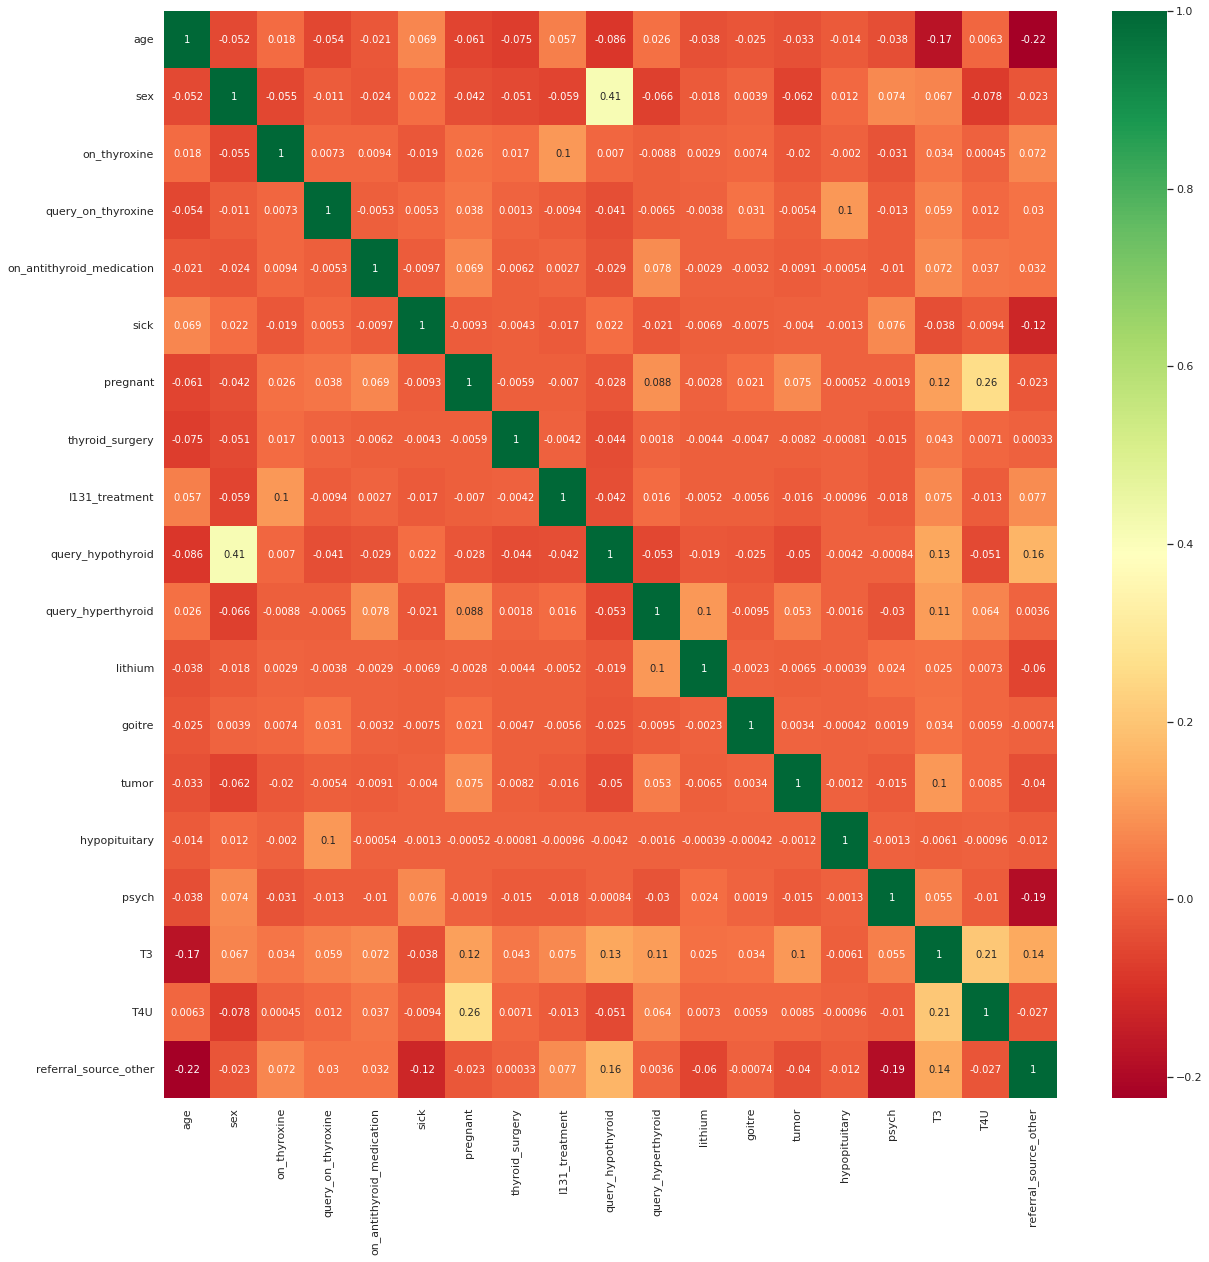

In [140]:
#same corealations can be seend on sampled data with out the target class 
#get correlations of each features in dataset
corrmat = x_sampled.corr()
top_corr_features = corrmat.index
plot.figure(figsize=(20,20))
#plot heat map
sns.heatmap(x_sampled[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Corss validating if there are any features we can use again for clustering but there ain't any good features as per problem statement to perform clustering (This dataset is small)

In [59]:
#scaling down the sampled data before it was done in function only to check the vif score 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x_sampled)
X_scaled

array([[-0.49550796, -0.67981195, -0.23977534, ...,  0.50441192,
        -0.11314676, -1.46928628],
       [-1.5511517 , -0.67981195, -0.23977534, ...,  0.50441192,
        -0.11314676,  0.68060256],
       [-0.20227359,  1.47099504, -0.23977534, ...,  0.50441192,
        -0.11314676,  0.68060256],
       ...,
       [-0.20227359, -0.67981195, -0.23977534, ..., -0.72046278,
        -0.11314676,  0.68060256],
       [-0.49550796,  1.47099504, -0.23977534, ...,  0.50441192,
        -0.11314676,  0.68060256],
       [-0.20227359, -0.67981195, -0.23977534, ..., -0.72046278,
        -0.11314676,  0.68060256]])

In [60]:
y_sampled.unique()

array([1., 0., 2., 3.])

In [61]:
# performing train test split
x_train, x_test, y_train, y_test = train_test_split(X_scaled , y_sampled , test_size = .20 , random_state = 144) #using 20% of data as test set

In [62]:
x_train

array([[-0.49550796,  1.47099504, -0.23977534, ...,  0.50441192,
        -0.11314676,  0.68060256],
       [-0.49550796,  1.47099504, -0.23977534, ...,  0.50441192,
        -0.11314676,  0.68060256],
       [ 2.02630763, -0.67981195, -0.23977534, ...,  0.50441192,
        -0.11314676,  0.68060256],
       ...,
       [ 0.91201702, -0.67981195, -0.23977534, ..., -0.72046278,
        -0.11314676,  0.68060256],
       [ 1.32254514, -0.67981195, -0.23977534, ...,  0.50441192,
        -0.11314676,  0.68060256],
       [ 0.03231391,  1.47099504, -0.23977534, ..., -0.72046278,
        -0.11314676,  0.68060256]])

In [63]:
x_test

array([[ 0.5014889 , -0.67981195, -0.23977534, ...,  0.50441192,
        -0.11314676,  0.68060256],
       [ 0.32554828,  1.47099504, -0.23977534, ...,  0.50441192,
        -0.11314676,  0.68060256],
       [ 2.02630763, -0.67981195, -0.23977534, ...,  0.50441192,
        -0.11314676,  0.68060256],
       ...,
       [-0.20227359, -0.67981195, -0.23977534, ..., -0.72046278,
        -0.11314676,  0.68060256],
       [-2.84138293,  1.47099504, -0.23977534, ...,  0.50441192,
        -0.11314676,  0.68060256],
       [-0.67144858, -0.67981195, -0.23977534, ...,  0.50441192,
        -0.11314676, -1.46928628]])

In [64]:
y_test

8668     2.0
4743     0.0
9412     2.0
705      1.0
6282     0.0
        ... 
209      1.0
12895    3.0
12708    3.0
4139     0.0
149      1.0
Name: Class, Length: 2785, dtype: float64

In [65]:
y_test

8668     2.0
4743     0.0
9412     2.0
705      1.0
6282     0.0
        ... 
209      1.0
12895    3.0
12708    3.0
4139     0.0
149      1.0
Name: Class, Length: 2785, dtype: float64

In [66]:
x_test[0]

array([ 0.5014889 , -0.67981195, -0.23977534, -0.08244282, -0.06411301,
       -0.1511483 , -0.0618136 , -0.09594217, -0.11379465,  2.00170729,
       -0.1929941 , -0.04568459, -0.04947529, -0.14194364, -0.00847488,
       -0.15556373,  0.50441192, -0.11314676,  0.68060256])

# Using logistic Regression Classifier

In [67]:
logisticregression_liblinear = LogisticRegression(verbose=1,solver='liblinear')

In [68]:
logisticregression_liblinear.fit(x_train,y_train )

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [69]:
logisticregression_liblinear.predict(x_test)

array([3., 1., 0., ..., 3., 3., 1.])

In [70]:
logisticregression_liblinear.predict([x_test[1]])

array([1.])

In [71]:
logisticregression_liblinear.predict_log_proba([x_test[1]])

array([[-1.05254404, -0.88350375, -1.45003482, -5.7902898 ]])

In [72]:
y_pred_liblinear_probility = logisticregression_liblinear.predict_log_proba(x_test)
y_pred_liblinear_probility

array([[-1.23206104e+00, -3.07994866e+00, -2.93827280e+00,
        -4.95296011e-01],
       [-1.05254404e+00, -8.83503749e-01, -1.45003482e+00,
        -5.79028980e+00],
       [-7.82311367e-01, -8.60460610e-01, -3.17554526e+00,
        -2.55215253e+00],
       ...,
       [-1.58946846e+00, -2.62937854e+00, -1.11893590e+00,
        -9.23276271e-01],
       [-2.64830068e+00, -3.63625513e+00, -2.14691919e+00,
        -2.40754965e-01],
       [-6.84765454e+00, -2.07450236e-03, -6.89846801e+00,
        -1.37403915e+01]])

In [73]:
y_test.iloc[1]

0.0

In [74]:
y_pred_liblinear = logisticregression_liblinear.predict(x_test)
y_pred_liblinear

array([3., 1., 0., ..., 3., 3., 1.])

[[306 194 116  92]
 [199 388  92  33]
 [104  46 353 150]
 [  0   0   0 712]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


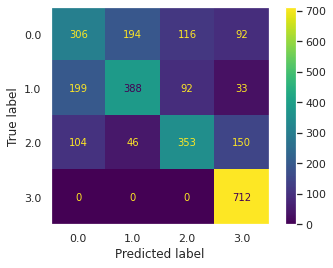

In [75]:
# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, y_pred_liblinear))


# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(logisticregression_liblinear, x_test, y_test)
plot.grid(False)
plot.show()

In [76]:
print(f"Accuracy of the logisticregression_liblinear classifier is: {accuracy_score(y_test, y_pred_liblinear)}")
print(f"Precision Score of the logisticregression_liblinear classifier is: {precision_score(y_test, y_pred_liblinear, average='micro')}")
print(f"Recall Score of the logisticregression_liblinear classifier is: {recall_score(y_test, y_pred_liblinear, average='micro')}")
print(f"Recall Score of the logisticregression_liblinear classifier is: {recall_score(y_test, y_pred_liblinear, average='micro')}")

Accuracy of the logisticregression_liblinear classifier is: 0.6315978456014363
Precision Score of the logisticregression_liblinear classifier is: 0.6315978456014363
Recall Score of the logisticregression_liblinear classifier is: 0.6315978456014363
Recall Score of the logisticregression_liblinear classifier is: 0.6315978456014363


In [77]:
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)
multiclass_roc_auc_score(y_test,y_pred_liblinear)

0.7532315567967933

In [78]:
auc = multiclass_roc_auc_score(y_test,y_pred_liblinear)

In [79]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_liblinear, pos_label= 0)

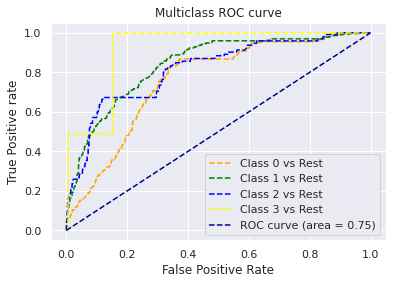

In [80]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test,y_pred_liblinear_probility[:,i], pos_label= i)
    
# plotting    
plot.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plot.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plot.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plot.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plot.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plot.title('Multiclass ROC curve')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive rate')
plot.legend(loc='best')
plot.savefig('Multiclass ROC',dpi=300);    

In [81]:
#https://inblog.in/AUC-ROC-score-and-curve-in-multiclass-classification-problems-2ja4jOHb2X

# Using Support Vector Classifer 

In [82]:
from sklearn.svm import SVC  
SVC_clf = SVC(kernel='linear',gamma='auto', probability=True) 
SVC_clf.fit(x_train,y_train ) 

SVC(gamma='auto', kernel='linear', probability=True)

In [83]:
y_pred_SVC_probility = SVC_clf.predict_proba(x_test)
y_pred_SVC_probility

array([[4.73742153e-01, 2.67168638e-01, 1.04463864e-01, 1.54625346e-01],
       [4.15735469e-01, 2.57073080e-01, 2.35859305e-01, 9.13321457e-02],
       [5.21741001e-01, 3.08997802e-01, 1.48760963e-01, 2.05002348e-02],
       ...,
       [8.90468224e-02, 4.07424207e-02, 2.14705524e-01, 6.55505232e-01],
       [7.79185860e-02, 1.95003050e-02, 1.88263189e-02, 8.83754790e-01],
       [2.61935925e-02, 9.30494308e-01, 4.29412500e-02, 3.70849585e-04]])

In [84]:
y_pred_SVC = SVC_clf.predict(x_test)
y_pred_SVC

array([0., 0., 0., ..., 3., 3., 1.])

[[349 199 143  17]
 [217 382 105   8]
 [108  55 402  88]
 [  0   0   0 712]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


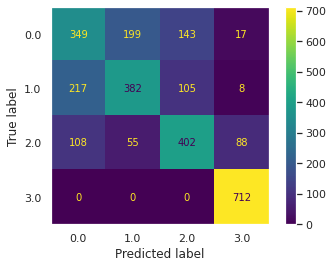

In [85]:
# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, y_pred_SVC))


# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(SVC_clf, x_test, y_test)
plot.grid(False)
plot.show()

In [86]:
print(f"Accuracy of the logisticregression_liblinear classifier is: {accuracy_score(y_test, y_pred_SVC)}")
print(f"Precision Score of the logisticregression_liblinear classifier is: {precision_score(y_test, y_pred_SVC, average='micro')}")
print(f"Recall Score of the logisticregression_liblinear classifier is: {recall_score(y_test, y_pred_SVC, average='micro')}")
print(f"Recall Score of the logisticregression_liblinear classifier is: {recall_score(y_test, y_pred_SVC, average='micro')}")

Accuracy of the logisticregression_liblinear classifier is: 0.6624775583482945
Precision Score of the logisticregression_liblinear classifier is: 0.6624775583482945
Recall Score of the logisticregression_liblinear classifier is: 0.6624775583482945
Recall Score of the logisticregression_liblinear classifier is: 0.6624775583482945


In [87]:
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)
multiclass_roc_auc_score(y_test,y_pred_SVC)

0.7744048030800038

In [88]:
auc2 = multiclass_roc_auc_score(y_test,y_pred_SVC)
auc2

0.7744048030800038

In [89]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_SVC, pos_label= 0)

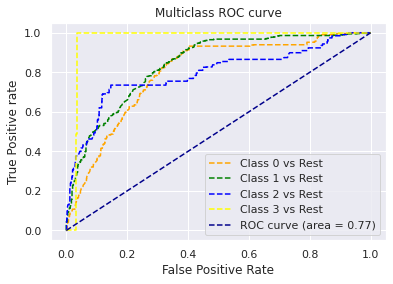

In [90]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test,y_pred_SVC_probility[:,i], pos_label= i)
    
# plotting    
plot.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plot.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plot.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plot.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plot.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc2)
plot.title('Multiclass ROC curve')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive rate')
plot.legend(loc='best')
plot.savefig('Multiclass ROC',dpi=300);    

In [91]:
from sklearn.neighbors import KNeighborsClassifier  
classifier_KNN= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier_KNN.fit(x_train, y_train)  

KNeighborsClassifier()

In [92]:
y_pred_classifier_KNN = classifier_KNN.predict(x_test)  
y_pred_classifier_KNN

array([2., 0., 0., ..., 3., 0., 1.])

In [164]:
classifier_KNN.score(x_train, y_train)

0.9089684890923782

In [165]:
classifier_KNN.score(x_test, y_test)

0.8843806104129264

In [93]:
y_pred_Prob_classifier_KNN = classifier_KNN.predict_proba(x_test)  
y_pred_Prob_classifier_KNN

array([[0. , 0. , 1. , 0. ],
       [1. , 0. , 0. , 0. ],
       [0.4, 0.2, 0.4, 0. ],
       ...,
       [0. , 0. , 0. , 1. ],
       [1. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. ]])

[[625  45  38   0]
 [146 507  56   3]
 [ 34   0 619   0]
 [  0   0   0 712]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


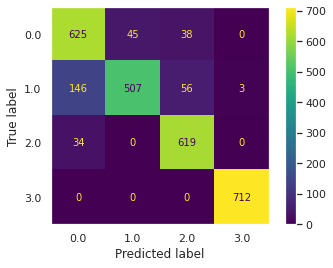

In [94]:
# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, y_pred_classifier_KNN))

# plotting confusion_matrix
IC = type('IdentityClassifier', (), {"predict": lambda i : i, "_estimator_type": "classifier"})
plot_confusion_matrix(IC, y_pred_classifier_KNN, y_test); #normalize='true', values_format='.2%'
plot.grid(False)
plot.show()

In [95]:
print(f"Accuracy of the logisticregression_liblinear classifier is: {accuracy_score(y_test, y_pred_classifier_KNN)}")
print(f"Precision Score of the logisticregression_liblinear classifier is: {precision_score(y_test, y_pred_classifier_KNN, average='micro')}")
print(f"Recall Score of the logisticregression_liblinear classifier is: {recall_score(y_test, y_pred_classifier_KNN, average='micro')}")
print(f"Recall Score of the logisticregression_liblinear classifier is: {recall_score(y_test, y_pred_classifier_KNN, average='micro')}")

Accuracy of the logisticregression_liblinear classifier is: 0.8843806104129264
Precision Score of the logisticregression_liblinear classifier is: 0.8843806104129264
Recall Score of the logisticregression_liblinear classifier is: 0.8843806104129264
Recall Score of the logisticregression_liblinear classifier is: 0.8843806104129264


In [187]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classifier_KNN))
#Checking performance our model with ROC Score.
multiclass_roc_auc_score(y_test,y_pred_classifier_KNN)

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       708
         1.0       0.92      0.71      0.80       712
         2.0       0.87      0.95      0.91       653
         3.0       1.00      1.00      1.00       712

    accuracy                           0.88      2785
   macro avg       0.89      0.89      0.88      2785
weighted avg       0.89      0.88      0.88      2785



0.923608908838728

In [96]:
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)
multiclass_roc_auc_score(y_test,y_pred_classifier_KNN)

0.923608908838728

In [97]:
auc3 = multiclass_roc_auc_score(y_test,y_pred_classifier_KNN)
auc3

0.923608908838728

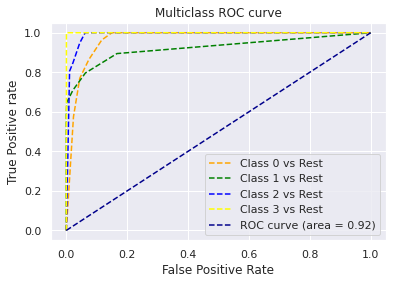

In [98]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_classifier_KNN, pos_label= 0)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test,y_pred_Prob_classifier_KNN[:,i], pos_label= i)
    
# plotting    
plot.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plot.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plot.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plot.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plot.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc3)
plot.title('Multiclass ROC curve')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive rate')
plot.legend(loc='best')
plot.savefig('Multiclass ROC',dpi=300);    

After comparing Logistic regressor , SCV and KNN Classfier I have got the best results in case of KNN Classifier Now performing Hyperparamter tuning on it using GridSerchCV and RandomisedSearchCV

In [206]:
classifier_KNN.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [180]:
#using gridSearchCV
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,5))
n_neighbors = list(range(1,5))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
#knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(classifier_KNN, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [189]:
prediction = best_model.predict(x_test)

In [195]:
#after hyper paramter tuning using GricdserchCV report 
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))
#Checking performance our model with ROC Score.
multiclass_roc_auc_score(y_test,prediction)

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       708
         1.0       0.91      0.80      0.85       712
         2.0       0.91      0.93      0.92       653
         3.0       1.00      1.00      1.00       712

    accuracy                           0.90      2785
   macro avg       0.91      0.90      0.90      2785
weighted avg       0.91      0.90      0.90      2785



0.9363043550295604

The multiclass roc auc score has imporved after the tuning of KNN model usign Grid Serch CV

In [196]:
import pickle
# open a file, where you ant to store the data
file = open('/content/drive/MyDrive/KNN_Model_hyperthyroid_model_gridserchCVhyperpara.pkl', 'wb')

# dump information to that file
pickle.dump(classifier_KNN, file) #(model name, file)

In [ ]:
#using randomized searchCV
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

In [223]:
#Randomized Search CV
# Create the random grid
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#'algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'
random_grid = { 'leaf_size':leaf_size, 
                'n_neighbors':n_neighbors, 
                'p':p}
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = classifier_KNN, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..................leaf_size=15, n_neighbors=25, p=1; total time=   0.8s
[CV] END ..................leaf_size=15, n_neighbors=25, p=1; total time=   0.8s
[CV] END ..................leaf_size=15, n_neighbors=25, p=1; total time=   0.8s
[CV] END ..................leaf_size=15, n_neighbors=25, p=1; total time=   0.8s
[CV] END ..................leaf_size=15, n_neighbors=25, p=1; total time=   0.8s
[CV] END ..................leaf_size=23, n_neighbors=10, p=1; total time=   1.4s
[CV] END ..................leaf_size=23, n_neighbors=10, p=1; total time=   0.6s
[CV] END ..................leaf_size=23, n_neighbors=10, p=1; total time=   0.5s
[CV] END ..................leaf_size=23, n_neighbors=10, p=1; total time=   0.5s
[CV] END ..................leaf_size=23, n_neighbors=10, p=1; total time=   0.5s
[CV] END ..................leaf_size=20, n_neighbors=15, p=1; total time=   0.5s
[CV] END ..................leaf_size=20, n_neigh

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
                                        'p': [1, 2]},
                   random_state=42, scoring='accuracy', verbose=2)

In [227]:
rf_random.best_params_

{'leaf_size': 9, 'n_neighbors': 2, 'p': 1}

In [228]:
prediction_RSCV = rf_random.predict(x_test)

In [229]:
#after hyper paramter tuning using GricdserchCV report 
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_RSCV))
#Checking performance our model with ROC Score.
multiclass_roc_auc_score(y_test,prediction_RSCV)

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85       708
         1.0       0.90      0.75      0.82       712
         2.0       0.92      0.88      0.90       653
         3.0       1.00      1.00      1.00       712

    accuracy                           0.89      2785
   macro avg       0.90      0.89      0.89      2785
weighted avg       0.90      0.89      0.89      2785



0.9285317001837794

# RESULT

the best result was found in case of KNN classfier and it was furter hypertuned using the hyperparmeters and gridserchCV adn the AUC ROC sore came out to be 0.9363043550295604 in that case